In [1]:
import pandas as pd
import numpy as np
import string

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_3.csv

--2025-04-02 08:10:55--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.69.123, 142.250.69.155, 142.250.69.59, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.69.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14174600 (14M) [application/octet-stream]
Saving to: ‘data/full_dataset/goemotions_1.csv’

goemotions_1.csv    100%[===================>]  13.52M  10.7MB/s    in 1.3s    

2025-04-02 08:10:56 (10.7 MB/s) - ‘data/full_dataset/goemotions_1.csv’ saved [14174600/14174600]

--2025-04-02 08:10:56--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.69.155, 142.250.69.91, 142.250.69.59, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.69.155|:443... connected.
HTTP request sent, awaiting response

In [44]:
import pandas as pd
import os

# Directory containing the dataset CSV files
data_dir = 'data/full_dataset'

# List to hold DataFrames
dfs = []

# Iterate over each file in the directory
for filename in os.listdir(data_dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(data_dir, filename)
        df = pd.read_csv(file_path)
        dfs.append(df)

# Concatenate all DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Save the combined DataFrame to a new CSV file (optional)
combined_df.to_csv('combined_annotations.csv', index=False)

In [ ]:
from datasets import load_dataset

ds = load_dataset("google-research-datasets/go_emotions", "simplified")

README.md:   0%|          | 0.00/9.40k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/2.77M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/350k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/347k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/43410 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5426 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5427 [00:00<?, ? examples/s]

In [7]:
train_dataset = ds['train']
df_train = pd.DataFrame(train_dataset)
df_train = df_train.drop(columns=['id'])

In [10]:
df_train.head()

text labels
0  My favourite food is anything I didn't have to...   [27]
1  Now if he does off himself, everyone will thin...   [27]
2                     WHY THE FUCK IS BAYLESS ISOING    [2]
3                        To make her feel threatened   [14]
4                             Dirty Southern Wankers    [3]

In [13]:
test_dataset = ds['test']
df_test = pd.DataFrame(test_dataset)
df_test.head()

text labels       id
0  I’m really sorry about your situation :( Altho...   [25]  eecwqtt
1    It's wonderful because it's awful. At not with.    [0]  ed5f85d
2  Kings fan here, good luck to you guys! Will be...   [13]  een27c3
3  I didn't know that, thank you for teaching me ...   [15]  eelgwd1
4  They got bored from haunting earth for thousan...   [27]  eem5uti

In [14]:
df_test = df_test.drop(columns=['id'])
df_test.head()

text labels
0  I’m really sorry about your situation :( Altho...   [25]
1    It's wonderful because it's awful. At not with.    [0]
2  Kings fan here, good luck to you guys! Will be...   [13]
3  I didn't know that, thank you for teaching me ...   [15]
4  They got bored from haunting earth for thousan...   [27]

In [15]:
df_val = pd.DataFrame(ds['validation'])
df_val = df_val.drop(columns=['id'])
df_val.head()

text   labels
0  Is this in New Orleans?? I really feel like th...     [27]
1  You know the answer man, you are programmed to...  [4, 27]
2               I've never been this sad in my life!     [25]
3  The economy is heavily controlled and subsidiz...  [4, 27]
4  He could have easily taken a real camera from ...     [20]

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43410 entries, 0 to 43409
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    43410 non-null  object
 1   labels  43410 non-null  object
dtypes: object(2)
memory usage: 678.4+ KB


In [21]:
# Flatten all label lists and get unique labels
import itertools

unique_labels = set(itertools.chain.from_iterable(df_train['labels']))
print(unique_labels)
print(f"Number of unique labels: {len(unique_labels)}")

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27}
Number of unique labels: 28


In [50]:
max_sentence_length = df_train['text'].apply(lambda x: len(x.split())).max()
print(f"Max sentence length: {max_sentence_length}")

Max sentence length: 33


In [22]:
# average sentence length
df_train['text'].str.split().str.len().mean()

12.840175074867542

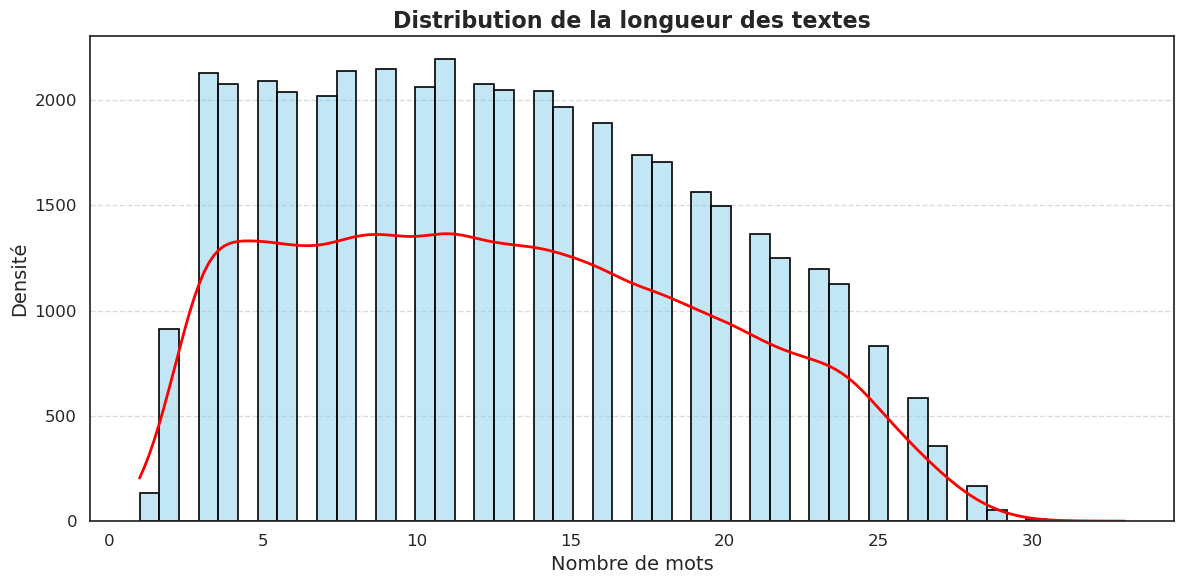

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la longueur des textes
df_train['text_word_count'] = df_train['text'].str.split().str.len()

# Définir la taille du graphique
plt.figure(figsize=(12, 6))

# Créer l'histogramme avec des personnalisations
sns.histplot(df_train['text_word_count'], 
             bins=50, 
             kde=True, 
             color='skyblue',  # Choisir une couleur
             edgecolor='black',  # Ajouter des bordures aux barres
             linewidth=1.2)  # Épaisseur des bordures

# Ajouter un titre et des labels
plt.title('Distribution de la longueur des textes', fontsize=16, fontweight='bold')
plt.xlabel('Nombre de mots', fontsize=14)
plt.ylabel('Densité', fontsize=14)

# Ajouter une grille pour une meilleure lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Personnaliser l'axe x pour une meilleure lisibilité
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Afficher la ligne KDE (estimation de la densité) avec une couleur différente
plt.gca().lines[0].set_color('red')  # Changer la couleur de la ligne KDE
plt.gca().lines[0].set_linewidth(2)  # Épaisseur de la ligne KDE

# Ajuster les marges pour une meilleure présentation
plt.tight_layout()

# Afficher le graphique
plt.show()

In [ ]:
labels_dict = {
    0: "admiration", 1: "amusement", 2: "anger", 3: "annoyance", 4: "approval",
    5: "caring", 6: "confusion", 7: "curiosity", 8: "desire", 9: "disappointment",
    10: "disapproval", 11: "disgust", 12: "embarrassment", 13: "excitement", 14: "fear",
    15: "gratitude", 16: "grief", 17: "joy", 18: "love", 19: "nervousness",
    20: "optimism", 21: "pride", 22: "realization", 23: "relief", 24: "remorse",
    25: "sadness", 26: "surprise", 27: "neutral"
}

df_train['description'] = df_train['labels'].apply(lambda label_list: [labels_dict[label] for label in label_list])
df_train.head(20)

text   labels  \
0   My favourite food is anything I didn't have to...     [27]   
1   Now if he does off himself, everyone will thin...     [27]   
2                      WHY THE FUCK IS BAYLESS ISOING      [2]   
3                         To make her feel threatened     [14]   
4                              Dirty Southern Wankers      [3]   
5   OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...     [26]   
6   Yes I heard abt the f bombs! That has to be wh...     [15]   
7   We need more boards and to create a bit more s...  [8, 20]   
8   Damn youtube and outrage drama is super lucrat...      [0]   
9   It might be linked to the trust factor of your...     [27]   
10  Demographics? I don’t know anybody under 35 wh...      [6]   
11  Aww... she'll probably come around eventually,...   [1, 4]   
12  Hello everyone. Im from Toronto as well. Can c...     [27]   
13  R/sleeptrain Might be time for some sleep trai...      [5]   
14  [NAME] - same fucking problem, slightly better...      [3]   
15  Shit, I guess I accidentally bought a Pay-Per-...  [3, 12]   
16                                   Thank you friend     [15]   
17                                    Fucking coward.      [2]   
18                that is what retardation looks like     [27]   
19  Maybe that’s what happened to the great white ...  [6, 22]   

                   description  
0                    [neutral]  
1                    [neutral]  
2                      [anger]  
3                       [fear]  
4                  [annoyance]  
5                   [surprise]  
6                  [gratitude]  
7           [desire, optimism]  
8                 [admiration]  
9                    [neutral]  
10                 [confusion]  
11       [amusement, approval]  
12                   [neutral]  
13                    [caring]  
14                 [annoyance]  
15  [annoyance, embarrassment]  
16                 [gratitude]  
17                     [anger]  
18                   [neutral]  
19    [confusion, realization]

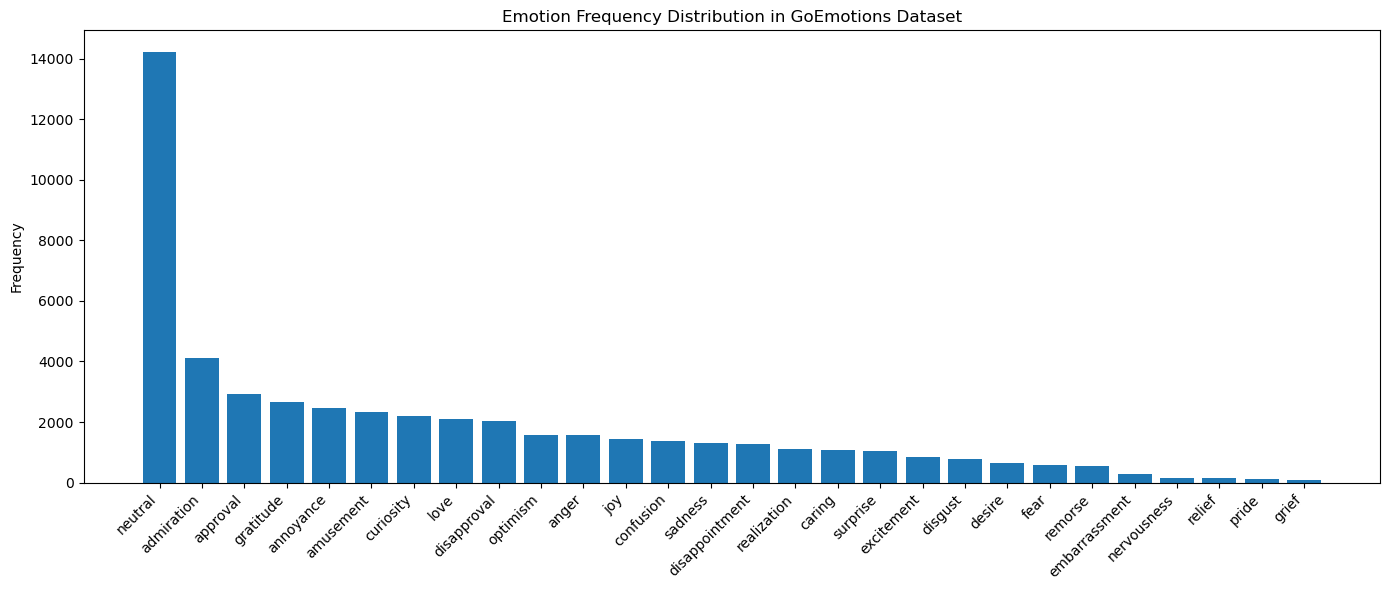

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import itertools
# Flatten all labels across the dataset
all_labels = list(itertools.chain.from_iterable(df_train['labels']))

# Count occurrences of each label ID
label_counts = Counter(all_labels)

# Convert to emotion names
emotion_freq = {labels_dict[label_id]: count for label_id, count in label_counts.items()}

# Sort by frequency (optional)
emotion_freq = dict(sorted(emotion_freq.items(), key=lambda item: item[1], reverse=True))

# Plotting
plt.figure(figsize=(14, 6))
plt.bar(emotion_freq.keys(), emotion_freq.values())
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.title('Emotion Frequency Distribution in GoEmotions Dataset')
plt.tight_layout()
plt.show()


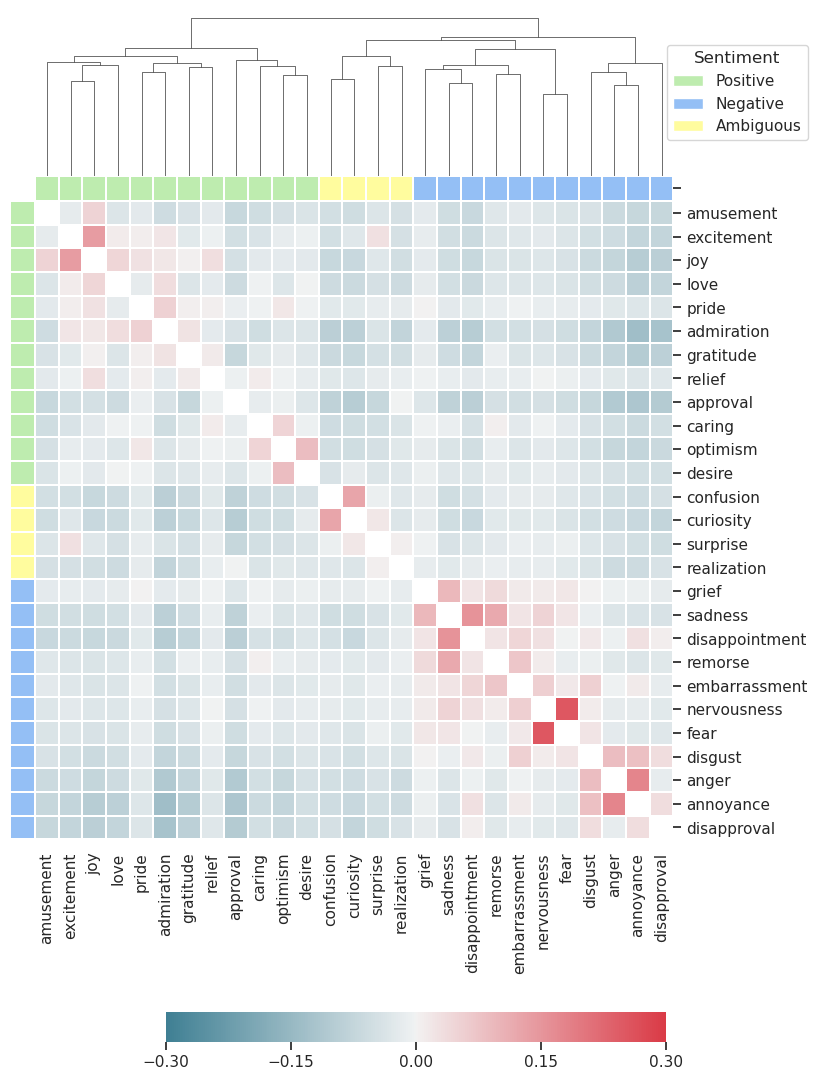

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist
from matplotlib.patches import Patch

# Load dataset (CSV with multiple raters per example)
df = pd.read_csv("data/combined_annotations.csv")  # merged rater CSVs

# Load emotions and sentiment groups
with open("data/emotions.txt", "r") as f:
    emotions = f.read().splitlines()  # 27 emotions (exclude "neutral")

with open("data/sentiment_dict.json") as f:
    sentiment_dict = json.load(f)

sentiment_colors = {
    "positive": "#BEECAF",
    "negative": "#94bff5",
    "ambiguous": "#FFFC9E"
}
sent_colors = {}
for e in emotions:
    if e in sentiment_dict["positive"]:
        sent_colors[e] = sentiment_colors["positive"]
    elif e in sentiment_dict["negative"]:
        sent_colors[e] = sentiment_colors["negative"]
    else:
        sent_colors[e] = sentiment_colors["ambiguous"]

# Remove examples with all-zero ratings
df = df[df[emotions].sum(axis=1) != 0]

# Compute average annotation per example
ratings = df.groupby("id")[emotions].mean()

# Correlation matrix between emotions
corr = ratings.corr()

# Custom hierarchical clustering
z = linkage(pdist(ratings.T, metric="correlation"), method="ward", optimal_ordering=True)

# Mask diagonal
mask = np.zeros_like(corr, dtype=bool)
np.fill_diagonal(mask, True)

# Row/column sentiment colors
row_colors = pd.Series(corr.columns, index=corr.columns).map(sent_colors)

# Plot the clustermap
sns.set(style="white")
g = sns.clustermap(
    corr,
    mask=mask,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmax=0.3, vmin=-0.3,
    center=0,
    row_linkage=z,
    col_linkage=z,
    row_colors=row_colors,
    col_colors=row_colors,
    linewidths=0.1,
    cbar_kws={
        "ticks": [-0.3, -0.15, 0, 0.15, 0.3],
        "orientation": "horizontal",
    },
    figsize=(10, 10)
)

g.ax_row_dendrogram.set_visible(False)
g.cax.set_position([.34, -0.05, .5, .03])  # reposition colorbar

# Add sentiment legend
legend_elements = [
    Patch(facecolor=sentiment_colors["positive"], label="Positive"),
    Patch(facecolor=sentiment_colors["negative"], label="Negative"),
    Patch(facecolor=sentiment_colors["ambiguous"], label="Ambiguous")
]
g.ax_col_dendrogram.legend(
    handles=legend_elements,
    title="Sentiment",
    loc="center",
    bbox_to_anchor=(1.1, 0.5)
)

plt.show()


In [47]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/maalih@labos.polymtl.ca/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True


 Emotion: anger
📁 Saved word cloud to: wordclouds/anger_wordcloud.png


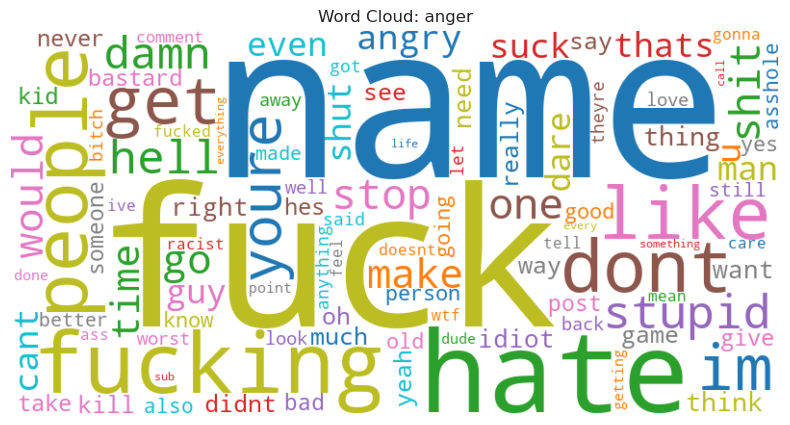

Top keywords (TF-IDF): dont, fuck, fucking, hate, hell, im, like, people, stupid, youre

 Emotion: fear
📁 Saved word cloud to: wordclouds/fear_wordcloud.png


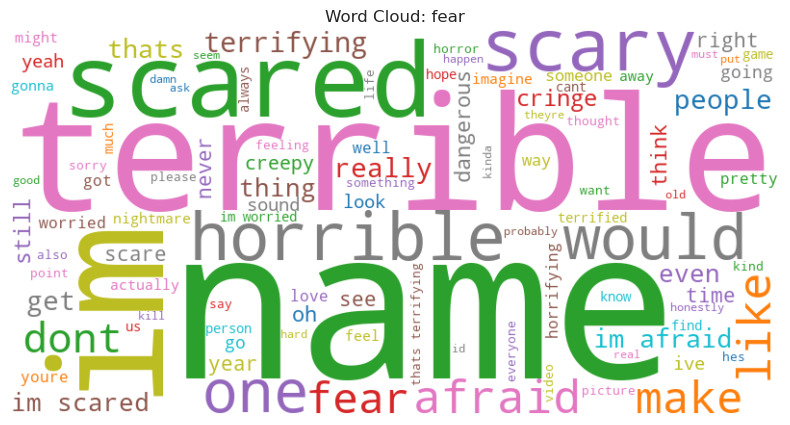

Top keywords (TF-IDF): afraid, dont, horrible, im, like, scared, scary, terrible, terrifying, thats

 Emotion: annoyance
📁 Saved word cloud to: wordclouds/annoyance_wordcloud.png


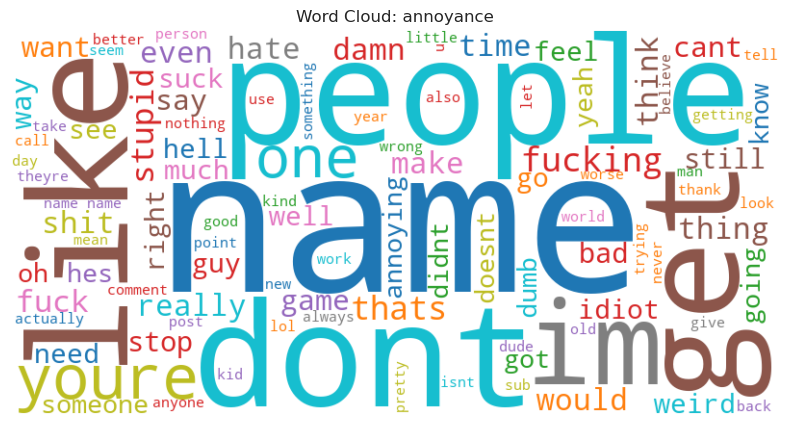

Top keywords (TF-IDF): damn, dont, fuck, fucking, im, like, people, stupid, thats, youre

 Emotion: surprise
📁 Saved word cloud to: wordclouds/surprise_wordcloud.png


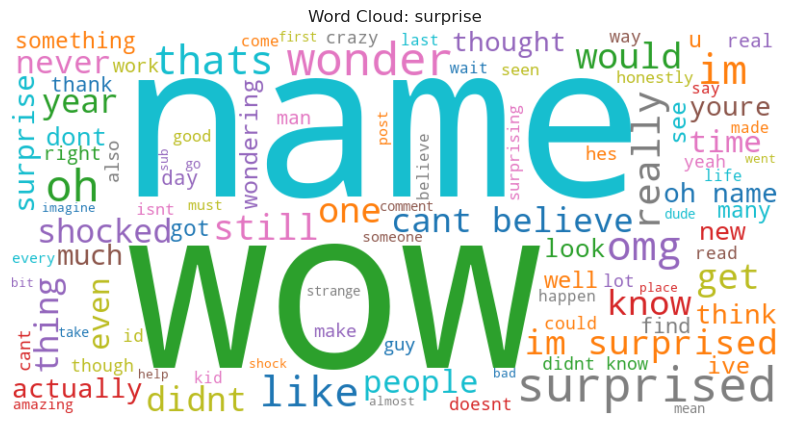

Top keywords (TF-IDF): didnt, im, know, like, oh, omg, surprised, thats, wonder, wow

 Emotion: gratitude
📁 Saved word cloud to: wordclouds/gratitude_wordcloud.png


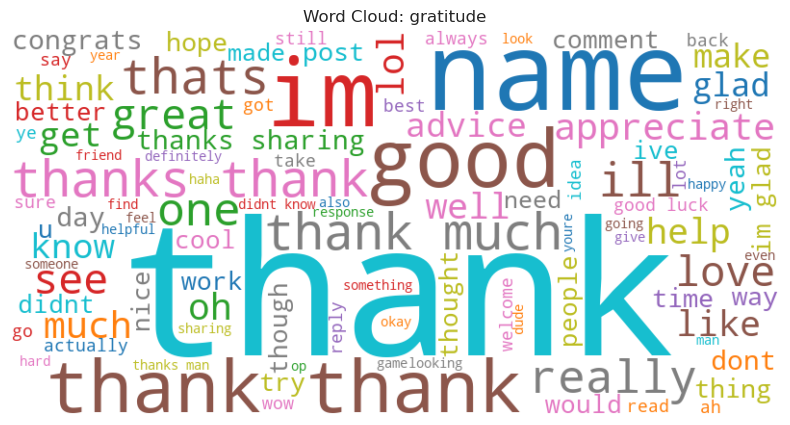

Top keywords (TF-IDF): glad, good, ill, im, know, like, really, thank, thanks, thats

 Emotion: desire
📁 Saved word cloud to: wordclouds/desire_wordcloud.png


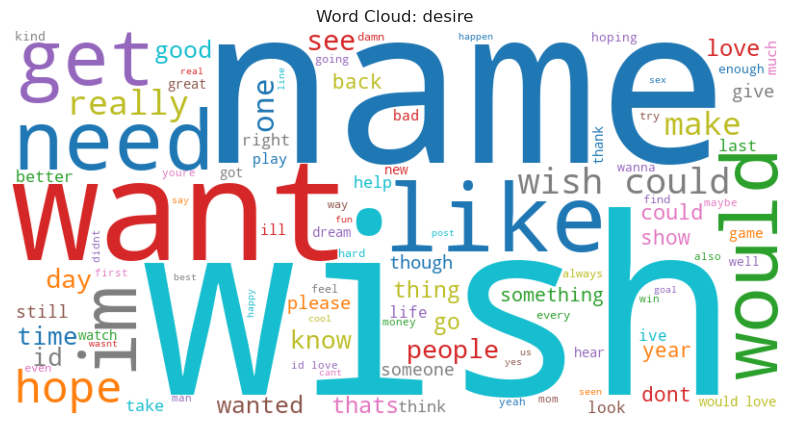

Top keywords (TF-IDF): hope, id, im, like, love, need, really, want, wanted, wish

 Emotion: optimism
📁 Saved word cloud to: wordclouds/optimism_wordcloud.png


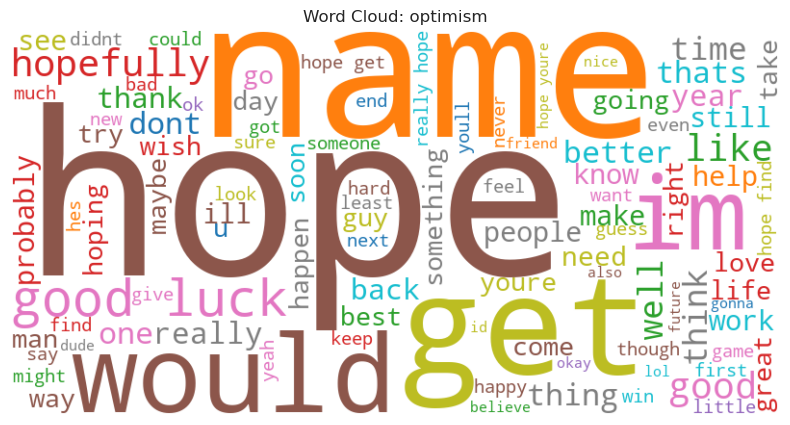

Top keywords (TF-IDF): better, good, hope, hopefully, im, like, luck, really, think, time

 Emotion: admiration
📁 Saved word cloud to: wordclouds/admiration_wordcloud.png


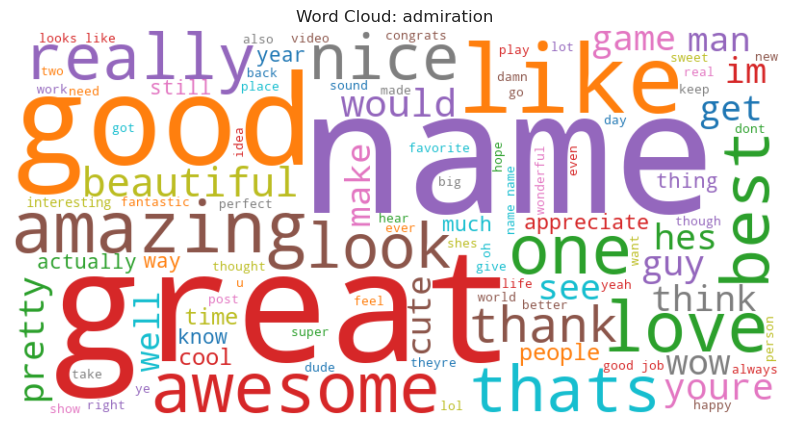

Top keywords (TF-IDF): amazing, awesome, best, good, great, like, love, nice, pretty, thats

 Emotion: confusion
📁 Saved word cloud to: wordclouds/confusion_wordcloud.png


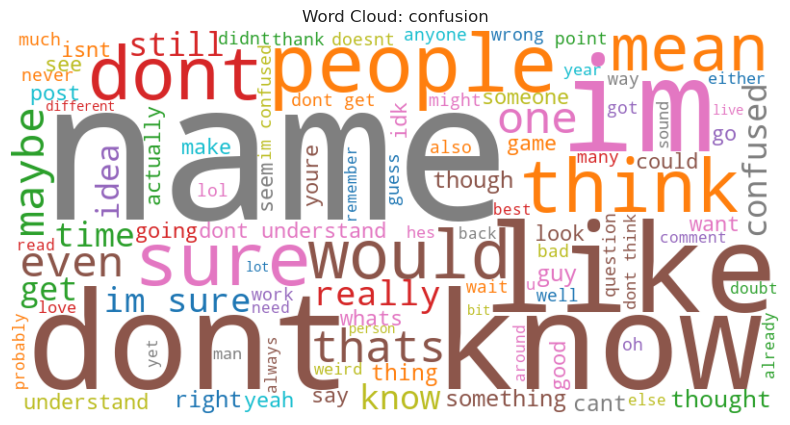

Top keywords (TF-IDF): confused, dont, im, know, like, people, sure, thats, think, understand

 Emotion: amusement
📁 Saved word cloud to: wordclouds/amusement_wordcloud.png


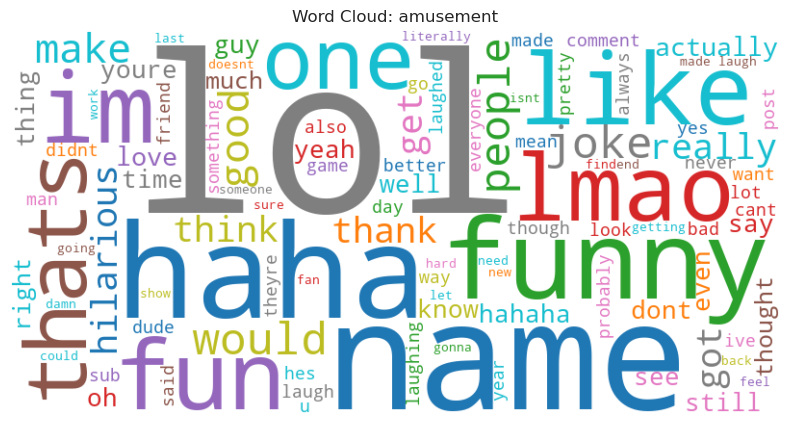

Top keywords (TF-IDF): fun, funny, good, haha, im, like, lmao, lol, people, thats

 Emotion: approval
📁 Saved word cloud to: wordclouds/approval_wordcloud.png


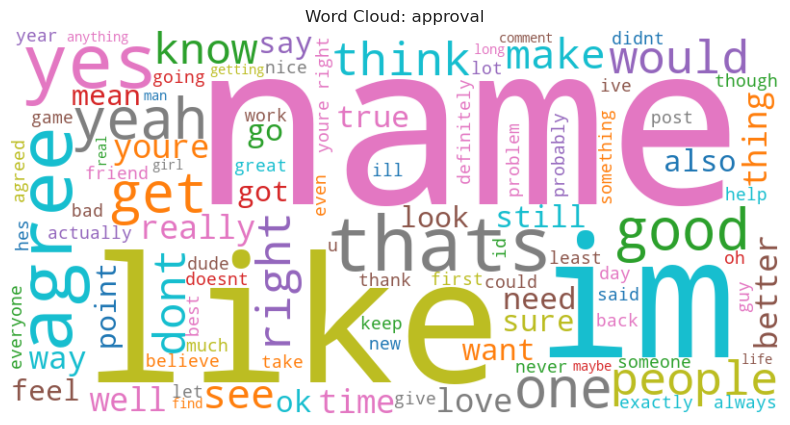

Top keywords (TF-IDF): agree, dont, good, im, like, right, thats, think, yeah, yes

 Emotion: caring
📁 Saved word cloud to: wordclouds/caring_wordcloud.png


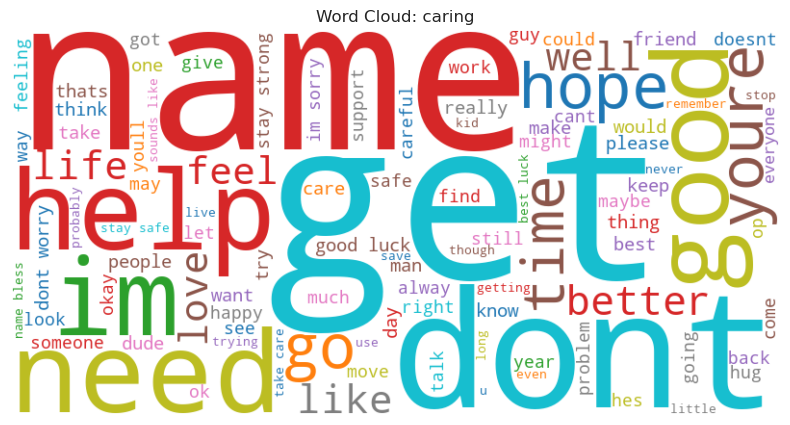

Top keywords (TF-IDF): best, better, dont, feel, good, help, hope, im, like, need

 Emotion: embarrassment
📁 Saved word cloud to: wordclouds/embarrassment_wordcloud.png


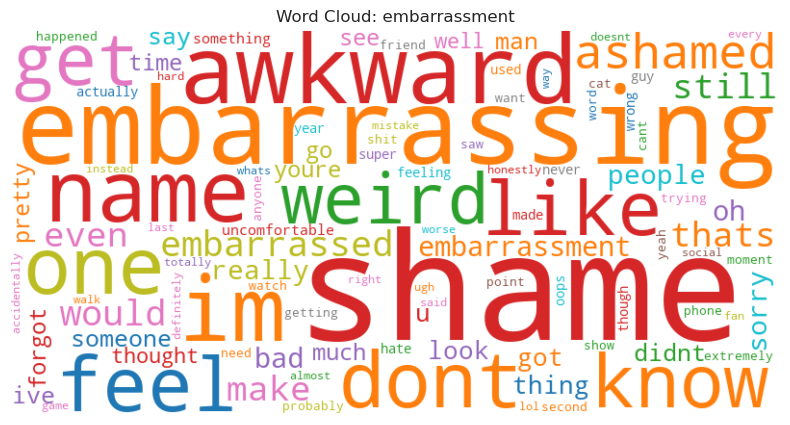

Top keywords (TF-IDF): awkward, dont, embarrassed, embarrassing, feel, im, know, like, shame, weird

 Emotion: realization
📁 Saved word cloud to: wordclouds/realization_wordcloud.png


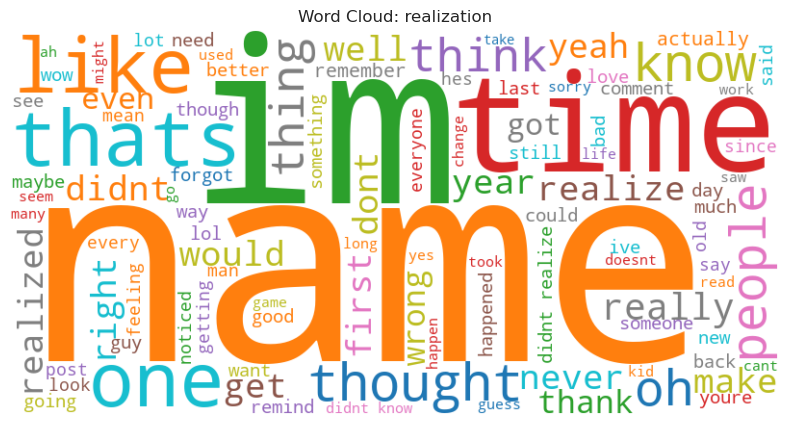

Top keywords (TF-IDF): didnt, im, know, like, oh, realize, thats, think, thought, time

 Emotion: disappointment
📁 Saved word cloud to: wordclouds/disappointment_wordcloud.png


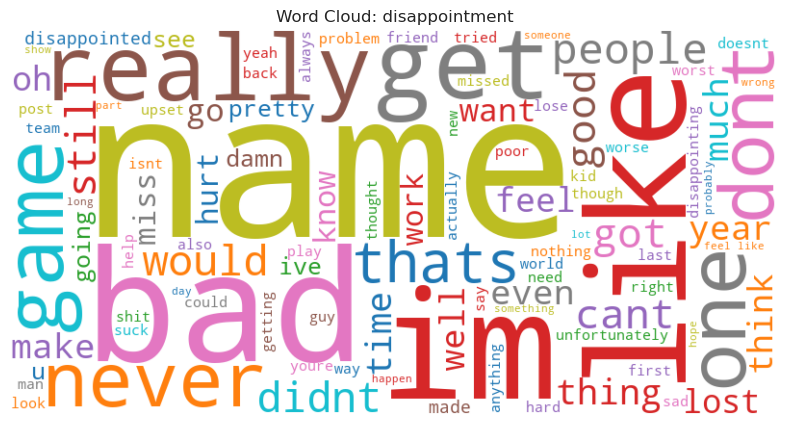

Top keywords (TF-IDF): bad, didnt, dont, feel, game, im, like, people, really, thats

 Emotion: grief
📁 Saved word cloud to: wordclouds/grief_wordcloud.png


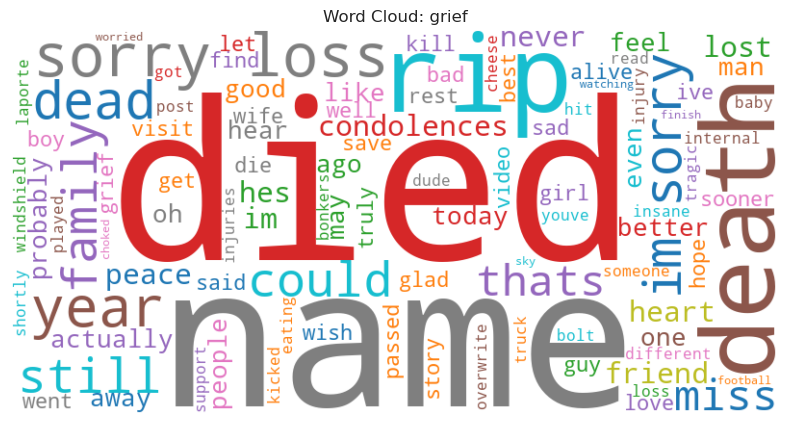

Top keywords (TF-IDF): dead, death, died, family, im, loss, lost, rip, sorry, years

 Emotion: sadness
📁 Saved word cloud to: wordclouds/sadness_wordcloud.png


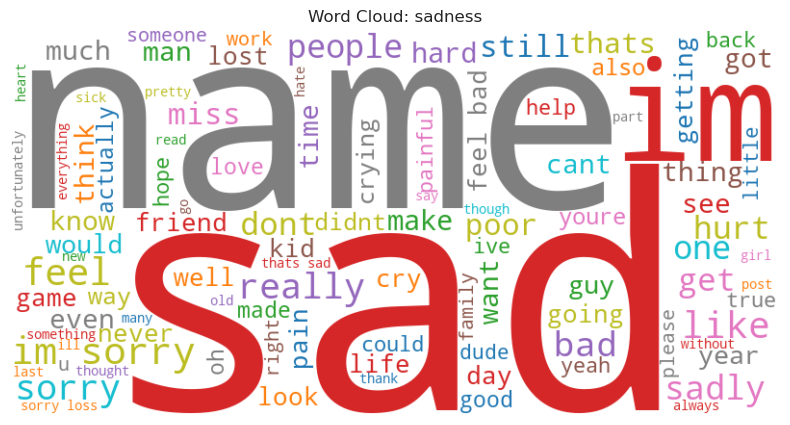

Top keywords (TF-IDF): bad, feel, im, like, people, really, sad, sadly, sorry, thats

 Emotion: curiosity
📁 Saved word cloud to: wordclouds/curiosity_wordcloud.png


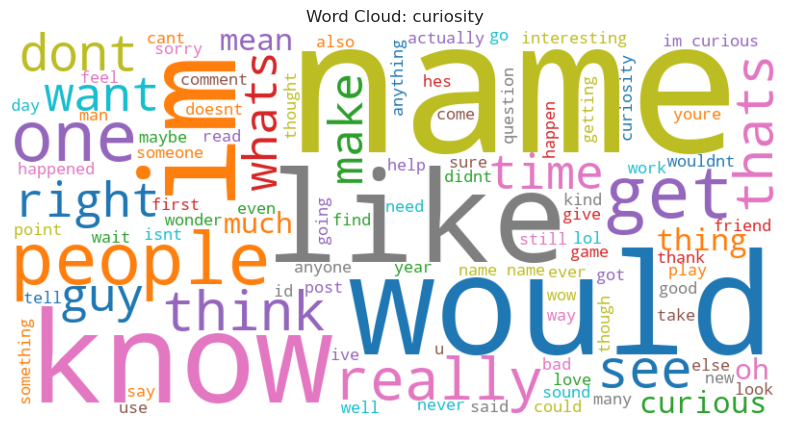

Top keywords (TF-IDF): curious, dont, im, know, like, people, really, thats, think, whats

 Emotion: joy
📁 Saved word cloud to: wordclouds/joy_wordcloud.png


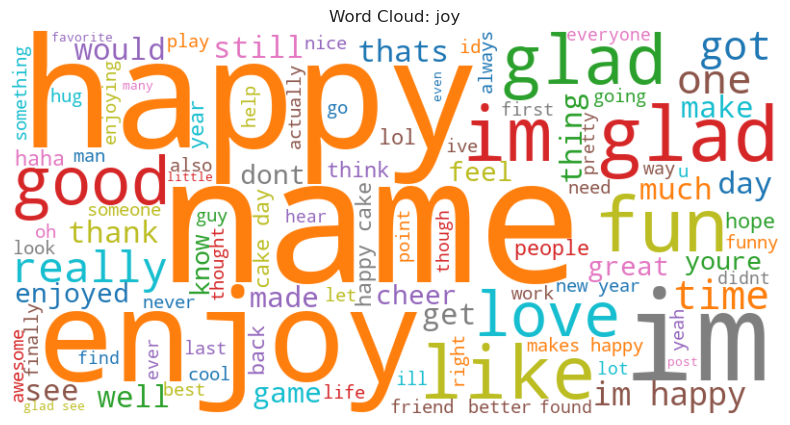

Top keywords (TF-IDF): day, enjoy, fun, glad, good, happy, im, like, love, really

 Emotion: love
📁 Saved word cloud to: wordclouds/love_wordcloud.png


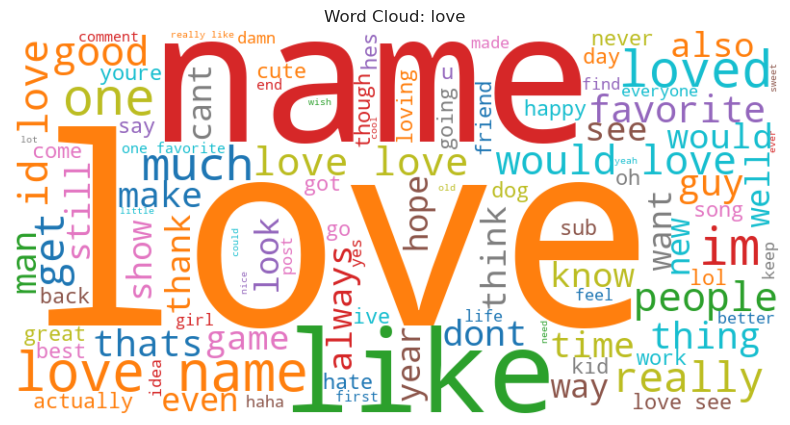

Top keywords (TF-IDF): dont, favorite, good, id, im, like, love, loved, people, really

 Emotion: excitement
📁 Saved word cloud to: wordclouds/excitement_wordcloud.png


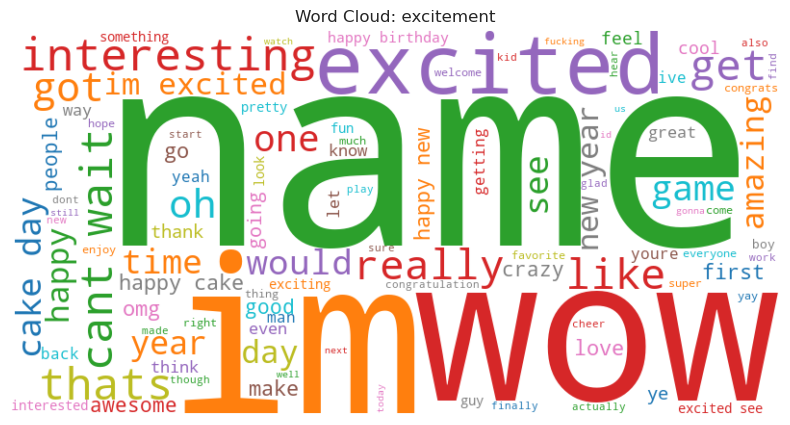

Top keywords (TF-IDF): day, excited, happy, im, interesting, like, new, thats, wait, wow

 Emotion: disapproval
📁 Saved word cloud to: wordclouds/disapproval_wordcloud.png


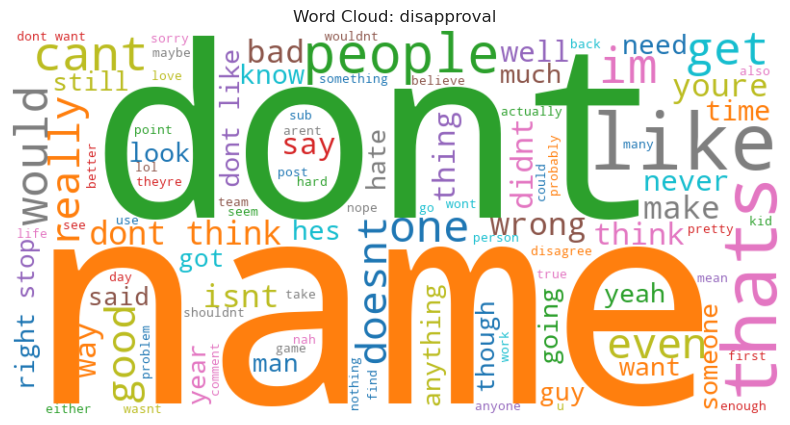

Top keywords (TF-IDF): bad, doesnt, dont, good, im, like, people, really, thats, think

 Emotion: remorse
📁 Saved word cloud to: wordclouds/remorse_wordcloud.png


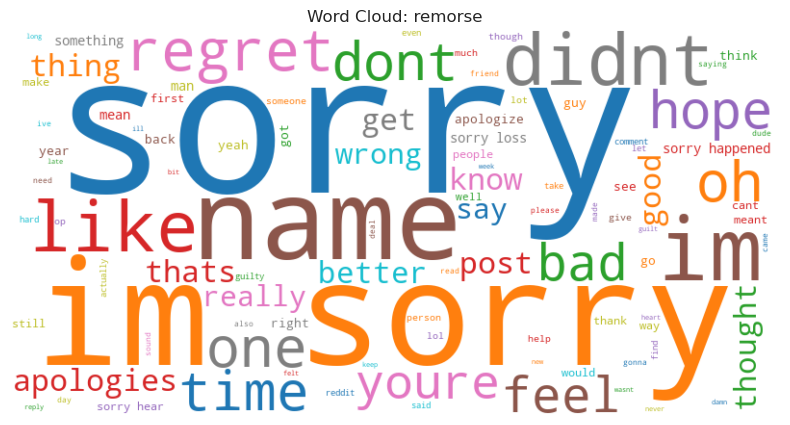

Top keywords (TF-IDF): bad, didnt, dont, hope, im, like, oh, regret, sorry, youre

 Emotion: disgust
📁 Saved word cloud to: wordclouds/disgust_wordcloud.png


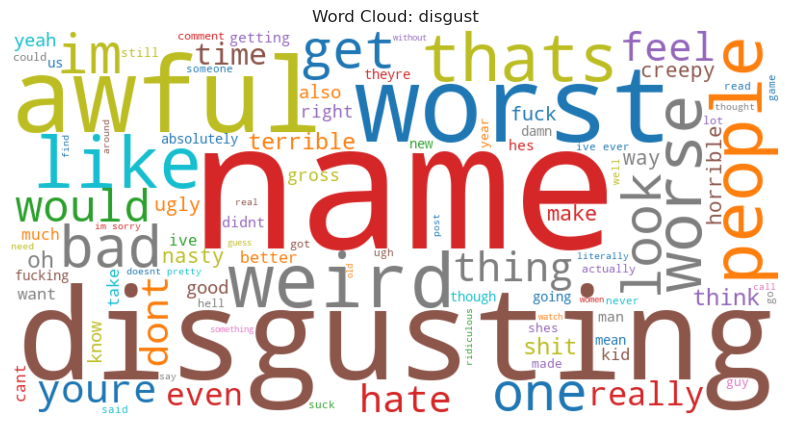

Top keywords (TF-IDF): awful, bad, disgusting, im, like, people, thats, weird, worse, worst

 Emotion: relief
📁 Saved word cloud to: wordclouds/relief_wordcloud.png


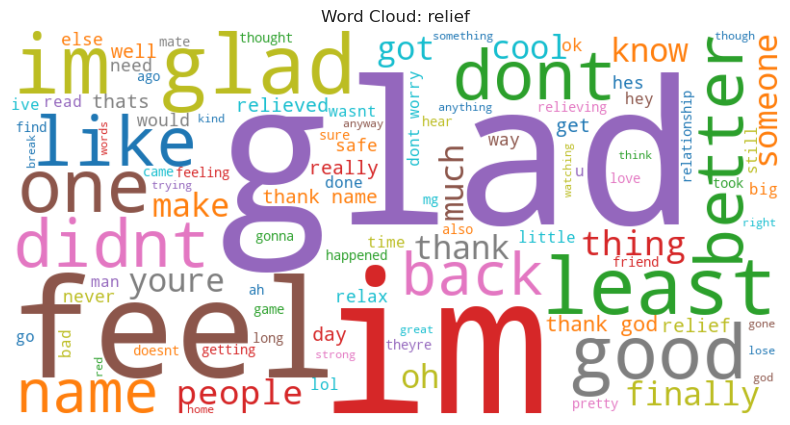

Top keywords (TF-IDF): better, didnt, dont, feel, glad, god, good, im, like, thank

 Emotion: pride
📁 Saved word cloud to: wordclouds/pride_wordcloud.png


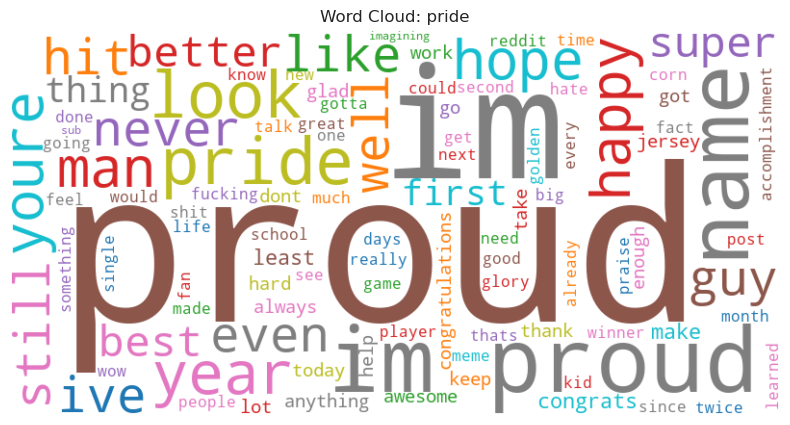

Top keywords (TF-IDF): best, happy, hope, im, ive, look, man, pride, proud, youre

 Emotion: nervousness
📁 Saved word cloud to: wordclouds/nervousness_wordcloud.png


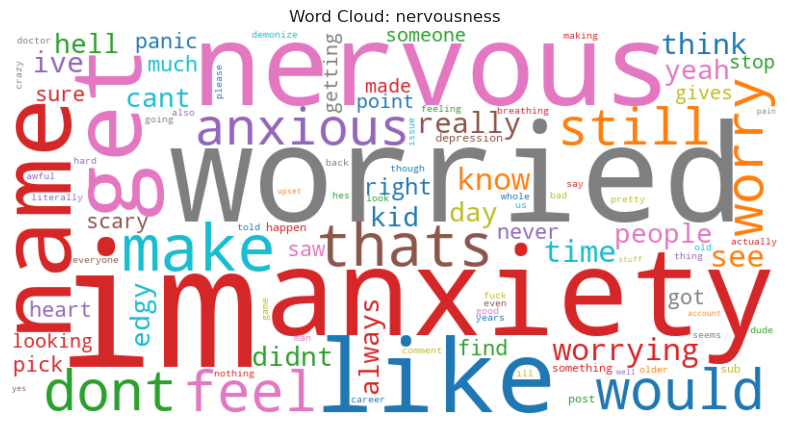

Top keywords (TF-IDF): anxiety, dont, feel, im, like, makes, nervous, thats, worried, worry


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import defaultdict
import re
import os
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Make sure output folder exists
os.makedirs("wordclouds", exist_ok=True)

# 1. Emotion setup
stop_words = set(stopwords.words('english'))

emotion_texts = defaultdict(list)
for _, row in df_train.iterrows():
    for label in row['labels']:
        if label == 27:  # Skip neutral
            continue
        emotion = labels_dict[label]
        emotion_texts[emotion].append(row['text'])

# 2. Preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)                   # remove URLs
    text = re.sub(r"[^a-z\s]", "", text)                  # remove punctuation/numbers
    text = re.sub(r"\s+", " ", text).strip()
    return text

# 3. Analyze each emotion
for emotion, texts in emotion_texts.items():
    print(f"\n Emotion: {emotion}")

    cleaned_texts = [clean_text(t) for t in texts]

    # Remove stopwords
    no_stop_texts = [" ".join([word for word in t.split() if word not in stop_words]) for t in cleaned_texts]

    # Combine for word cloud
    all_text = " ".join(no_stop_texts)

    # WordCloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=100,
        colormap='tab10',
        stopwords=stop_words
    ).generate(all_text)

    # Save word cloud to file
    wc_path = f"wordclouds/{emotion}_wordcloud.png"
    wordcloud.to_file(wc_path)
    print(f"📁 Saved word cloud to: {wc_path}")

    # Show in notebook (optional)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud: {emotion}")
    plt.show()

    # TF-IDF top keywords
    vectorizer = TfidfVectorizer(stop_words='english', max_features=10)
    tfidf_matrix = vectorizer.fit_transform(no_stop_texts)
    keywords = vectorizer.get_feature_names_out()

    print("Top keywords (TF-IDF):", ", ".join(keywords))
